## Ví dụ 1

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
np.random.seed(10) 
means = [[2, 2], [4, 2]] 
cov = [[.3, .2], [.2, .3]] 
N = 100 
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1 
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

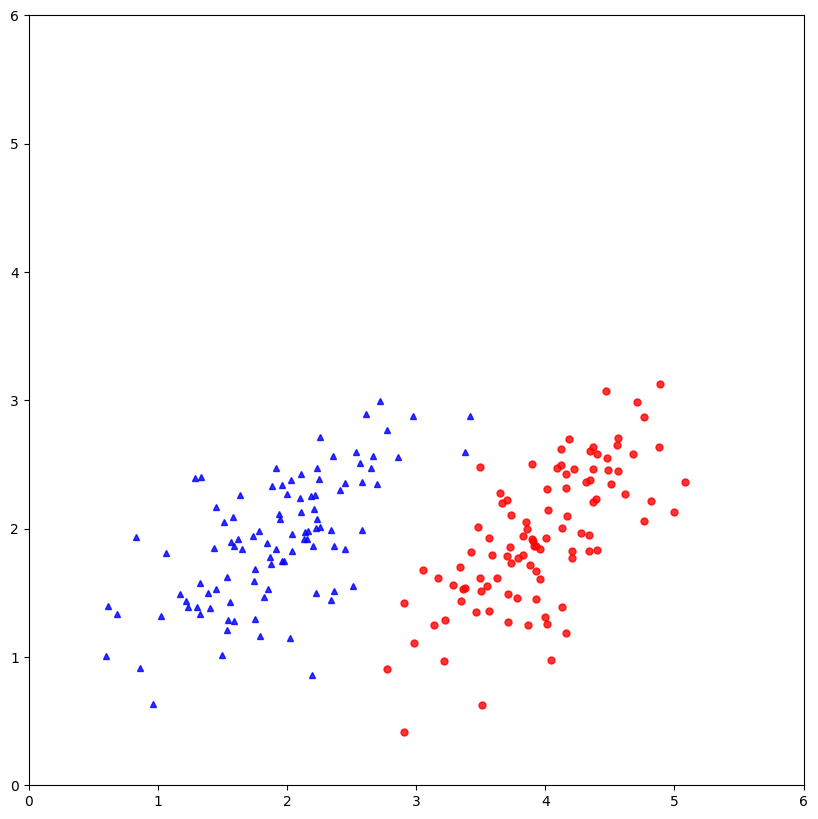

In [3]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 10)) 
ani = plt.cla() 
#plot points 
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8) 
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8) 
ani = plt.axis([0 , 6, 0, 6]) 
plt.show()

CVXOPT:

In [4]:
from cvxopt import matrix, solvers

# build P ~ K 
V = np.concatenate((X0.T, -X1.T), axis = 1) 
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8) 
q = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min 
h = matrix(np.zeros((2*N, 1))) 
A = matrix(y) # the equality constrain is actually y^T lambda = 0 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False 
sol = solvers.qp(P, q, G, h, A, b) 
l = np.array(sol['x']) # lambda 
print('lambda = ') 
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394979e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750934e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883550e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [5]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda 
S = np.where(l > epsilon)[0] 
VS = V[:, S] 
XS = X[:, S] 
yS = y[:, S] 
lS = l[S] 
# calculate w and b 
w = VS.dot(lS) 
w0 = np.mean(yS.T - w.T.dot(XS)) 
print('W = ', w.T) 
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.241417859322762


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


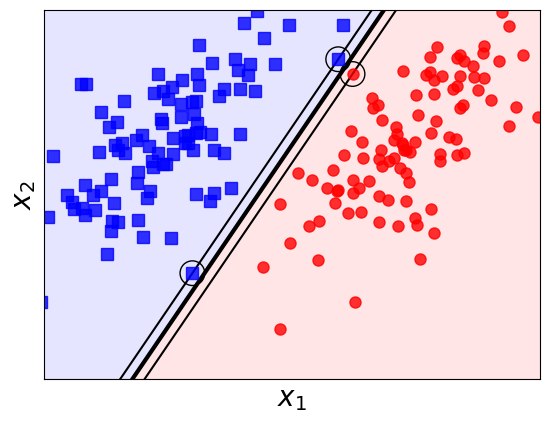

In [6]:
from matplotlib.backends.backend_pdf import PdfPages 
with PdfPages('D:\\svm4hardmargin.pdf') as pdf: 
    # draw 
    # plot points 
    fig, ax = plt.subplots() 
    x1 = np.arange(-10, 10, 0.1) 
    y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0] 
    y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0] 
    y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0] 
    plt.plot(x1, y1, 'k', linewidth = 3) 
    plt.plot(x1, y2, 'k') 
    plt.plot(x1, y3, 'k') 
    y4 = 10*x1 
    plt.plot(x1, y1, 'k') 
    plt.fill_between(x1, y1, color='red', alpha=0.1) 
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1) 
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8) 
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8) 
    plt.axis('equal') 
    plt.ylim(0, 3) 
    plt.xlim(2, 4) 
    # hide tikcs 
    cur_axes = plt.gca() 
    cur_axes.axes.get_xaxis().set_ticks([]) 
    cur_axes.axes.get_yaxis().set_ticks([]) 
    # add circles around support vectors 
    for m in S: 
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False) 
        ax.add_artist(circle)

    plt.xlabel('$x_1$', fontsize = 20) 
    plt.ylabel('$x_2$', fontsize = 20) 
        # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300) 
        # pdf.savefig() 
    plt.show()

Scikit-learn:

In [7]:
from sklearn.svm import SVC 
# Copy and put code for generate data here 
y1 = y.reshape((2*N,)) 
X1 = X.T # each sample is one row 
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
# if C is small, method will be “SoftMagin SVM”, 
# if C is large enough, method is near to hard margin 
clf.fit(X1, y1) 
w = clf.coef_ 
w0 = clf.intercept_ 
print('w = ', w) 
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


- Hai phương pháp cho ta bộ trọng số tối ưu khá tương đồng

## Bài tập tự thực hành 1

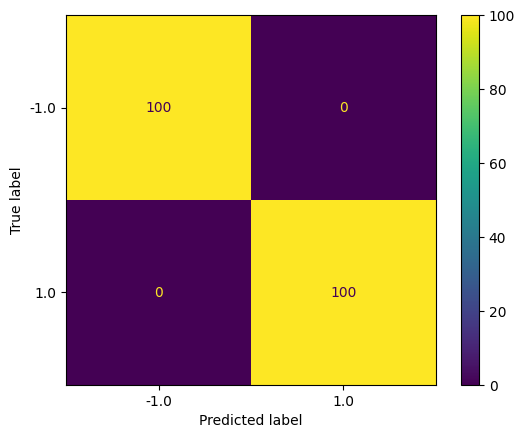

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X1)
ConfusionMatrixDisplay.from_predictions(y.squeeze(), y_pred)

## Bài tập tự thực hành 2

In [18]:
from sklearn import datasets 
cancer_data = datasets.load_breast_cancer() 
# show to test record 5th 
print(cancer_data.data[5]) 
print(cancer_data.data.shape) 
#target set 
print(cancer_data.target) 
from sklearn.model_selection import train_test_split 
cancer_data = datasets.load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,  
     cancer_data.target, test_size=0.3, 
     random_state=109)
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1


[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [19]:
from sklearn.svm import SVC 
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
# if C is small, method will be “SoftMagin SVM”, 
# if C is large enough, method is near to hard margin 
clf.fit(X_train, y_train) 
w = clf.coef_ 
w0 = clf.intercept_ 
print('w = ', w) 
print('W0 = ', w0)

w =  [[ 1.55841303e+04  5.69829895e+03  6.01236606e+02 -2.11652064e+02
  -7.58418989e+03 -3.58287335e+03 -2.28082132e+04 -1.67774049e+04
  -2.14646639e+04  2.35627498e+02 -4.23531681e+03  3.41852567e+04
  -7.07061016e+02 -1.82451704e+03 -1.29485985e+03  5.13476398e+03
  -1.07869294e+03 -3.52075548e+03 -5.84510533e+03  3.23810408e+02
   1.32407386e+03 -8.43438203e+03 -6.60376568e+02 -6.59702826e+00
  -1.27800564e+04  1.10353669e+04 -4.11879410e+04 -3.48086330e+04
  -6.38834076e+04  8.62849570e+02]]
W0 =  [88059.708578]


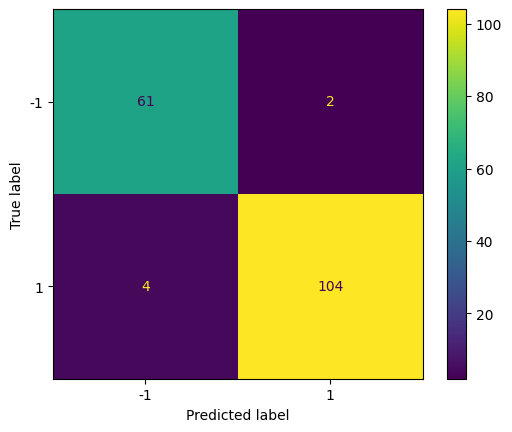

In [20]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Ví dụ 2

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('sonar.all-data.csv', header=None)
X, y = data.iloc[:, :60], data.iloc[:, 60]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [45]:
from sklearn.svm import SVC 
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
# if C is small, method will be “SoftMagin SVM”, 
# if C is large enough, method is near to hard margin 
clf.fit(X_train, y_train) 
w = clf.coef_ 
w0 = clf.intercept_ 
print('w = ', w) 
print('W0 = ', w0)

w =  [[ -7.12580725  -4.86012763  33.98811616 -20.81007555  -9.46189782
  -24.53271274  41.54202067  40.8151548  -34.03763978  -9.51790447
   -8.13221736 -23.87089765  13.31021013 -18.9404666    8.11640691
  -12.99473673  37.10678012 -25.32345113  12.23535033  -9.8855537
    7.16110197 -24.42376157  21.32206459 -20.09618053  -9.62439883
   17.15092621   7.21201166 -10.13235597  11.04376443 -34.1595695
   44.92429524 -29.52707581   4.79191358  18.17585822 -22.58824253
   19.81610108  -0.65314316   6.16688199 -18.78815058  17.68600671
   -2.77449325  -5.83413716  -9.80504848   2.61850427 -23.79620393
   23.07080198 -27.61222844 -22.83732755 -20.72955986  78.58973548
  -58.66029178 -59.66691291 -43.74814562  12.32507397  68.57014942
  -10.34244984  14.27313454  -9.53366495 -12.89300574  15.81821212]]
W0 =  [19.12907311]


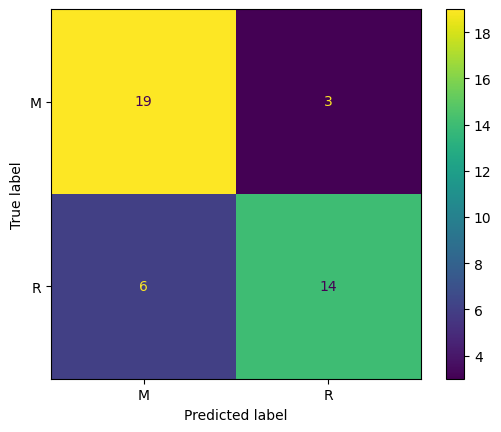

In [46]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)